In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
tmax = 3
fs = 44100
nt = fs*3
dt = tmax/nt

xmax = 0.65
nx = 100
dx = xmax/nx

T = 52.85784
mu = 0.00083557

In [3]:
C = (T/mu)**0.5
C * dt/dx

0.8774276994061564

In [4]:
ts = np.linspace(0, tmax, nt+1, dtype=np.float64)
xs = np.linspace(0,  xmax, nx+1, dtype=np.float64)

In [5]:
# u(t, x)
u = np.empty((nt+1, nx+1), dtype=np.float64)

In [6]:
# Initio conditions 
u[0] = np.where(xs < 0.18, -xs/18, xs/47 - 0.01383)
u[1] = u[0]

## Boundary conditions
u[:, 0] = 0
u[:,-1] = 0

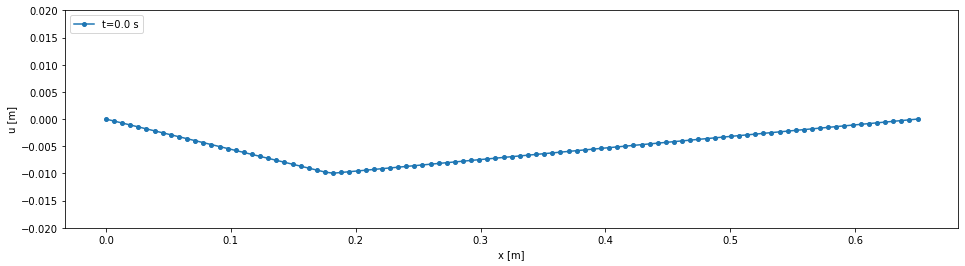

In [7]:
plt.figure(figsize=(16, 4))
plt.ylim(-0.02, 0.02)
plt.xlabel('x [m]')
plt.ylabel('u [m]')
plt.plot(xs, u[0], '-o', ms=4, label='t=0.0 s')
plt.legend(loc='upper left', ncol=10)
plt.savefig('Initio.png')
plt.show()

In [8]:
# Solve
for i in range(1, nt):
    for j in range(1, nx):
        u[i+1, j] = ((u[i, j+1] - 2*u[i, j] + u[i, j-1])*T*dt**2)/(mu*dx**2) + 2*u[i, j] - u[i-1, j]

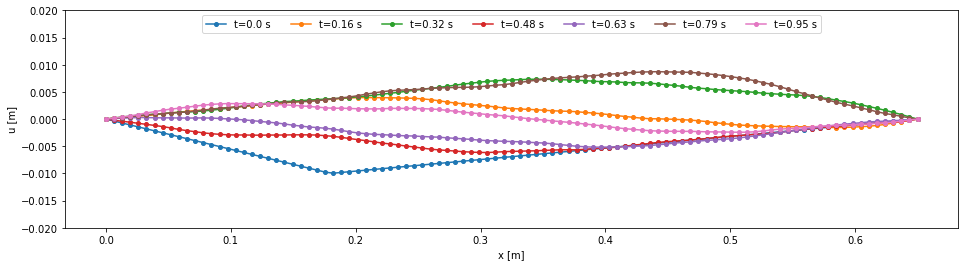

In [9]:
plt.figure(figsize=(16, 4))
plt.ylim(-0.02, 0.02)
plt.xlabel('x [m]')
plt.ylabel('u [m]')
for i in range(0, 1*fs, 7000):
    plt.plot(xs, u[i], '-o', ms=4, label='t={:.2} s'.format(i*dt))
plt.legend(loc='upper center', ncol=10)
plt.savefig('Solution.png')
plt.show()

In [180]:
# # Animation
# def animate(i):
#     ax.clear()
#     ax.plot(xs, u[i*10])
#     ax.set_ylim(-0.015, 0.015)

# fig, ax = plt.subplots(1,1, figsize=(16, 4))
# ax.set_ylim(-0.01, 0.01)
# ani = animation.FuncAnimation(fig, animate, frames=500, interval=1)
# ani.save('Animation.gif', writer='pillow')

![](./Animation.gif)
[Slow motion: Plucking a guitar string](https://youtu.be/LNNQvG0jWtw?t=16)

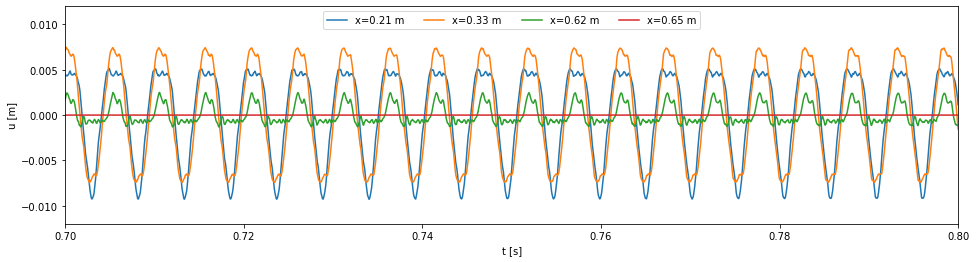

In [10]:
plt.figure(figsize=(16, 4))
plt.ylim(-0.012, 0.012)
plt.xlabel('t [s]')
plt.ylabel('u [m]')
t_star = 0.7
plt.xlim(t_star, t_star + 0.1)
for j in [int(nx/3), int(nx/2), int(19*nx/20), nx]:
    plt.plot(ts, u[:,j], label='x={:.2} m'.format(j*dx))
plt.legend(loc='upper center', ncol=10)
plt.savefig('Solution_2.png')
plt.show()

In [11]:
u_sum = np.sum(u, axis=-1)

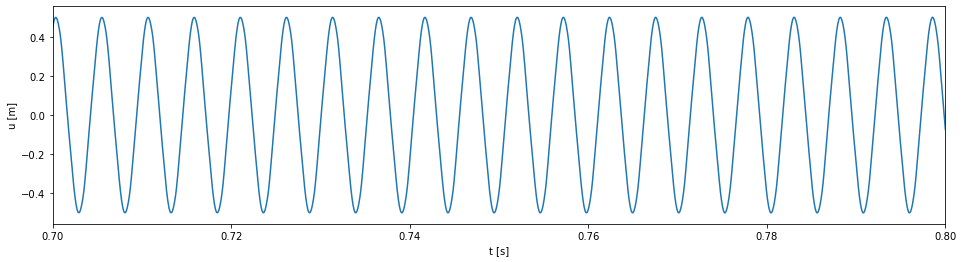

In [12]:
plt.figure(figsize=(16, 4))
plt.xlabel('t [s]')
plt.ylabel('u [m]')
t_star = 0.7
plt.xlim(t_star, t_star + 0.1)
plt.plot(ts, u_sum)
plt.savefig('Sum.png')
plt.show()

In [13]:
# FFT
from numpy.fft import rfft, rfftfreq

In [14]:
freq = rfftfreq(nt, d=dt) # The x axis of FFT

In [15]:
X = rfft(u_sum) # FFT
amplitude = np.abs(X)*0.01 # Amplitude of FFT

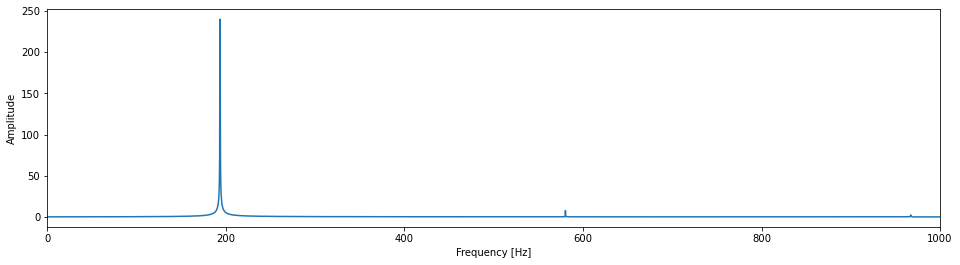

In [16]:
plt.figure(figsize=(16, 4))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
# plt.grid()
plt.xlim(0, 1000)
plt.plot(freq, amplitude)

In [17]:
 np.argmax(amplitude)

580

In [18]:
freq[580]

193.33333333333331

In [19]:
# Wave
from scipy.io import wavfile
from IPython.display import Audio

In [20]:
wavfile.write('u_sum_sound.wav', 44100,u_sum)